In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
from  partie1 import GRUEncoder, GRUDecoder
from partie1 import LSTMEncoder, LSTMDecoder
from partie1 import TensorProductEncoder


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
##### entiers 0-10 
def generate_data(batch_size, seq_len, min_val=0, max_val=10):
    return torch.randint(min_val, max_val, (batch_size, seq_len))

def precision(predicted, target):
    correct = (predicted.argmax(dim=-1) == target).float()
    return correct.mean().item() * 100

# ENTRAINEMENT

## **TPDN**


### GRU

In [3]:
def plot_tensors(tensor1, tensor2, labels=("Tensor 1", "Tensor 2")):

    tensor1 = tensor1.flatten()
    tensor2 = tensor2.flatten()
    x_indices = range(len(tensor1))


    plt.figure(figsize=(10, 6))
    plt.plot(x_indices, tensor1.detach().numpy(), label=labels[0], marker='o')
    plt.plot(x_indices, tensor2.detach().numpy(), label=labels[1], marker='x')

    plt.title("Comparaison des valeurs des tenseur en fonction de l'indice")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

/Users/baptistechachura/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 1, 32])) that is different to the input size (torch.Size([1, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[8, 7, 5, 0, 4, 1, 4, 2, 8, 6]])


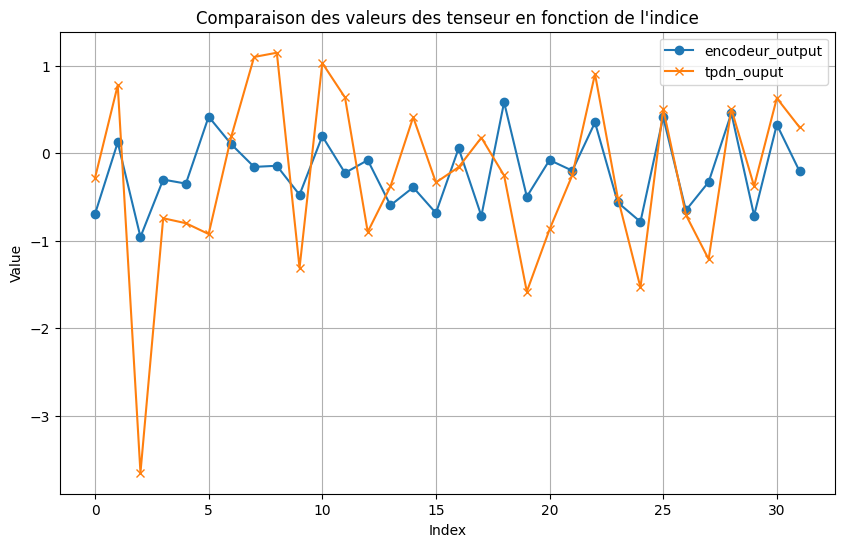

Epoch 999/1000, Loss: 0.7012, Accuracy: 69.38%
après save 
tensor([[3, 8, 6, 5, 7, 4, 0, 0, 1, 9]])


<Figure size 640x480 with 0 Axes>

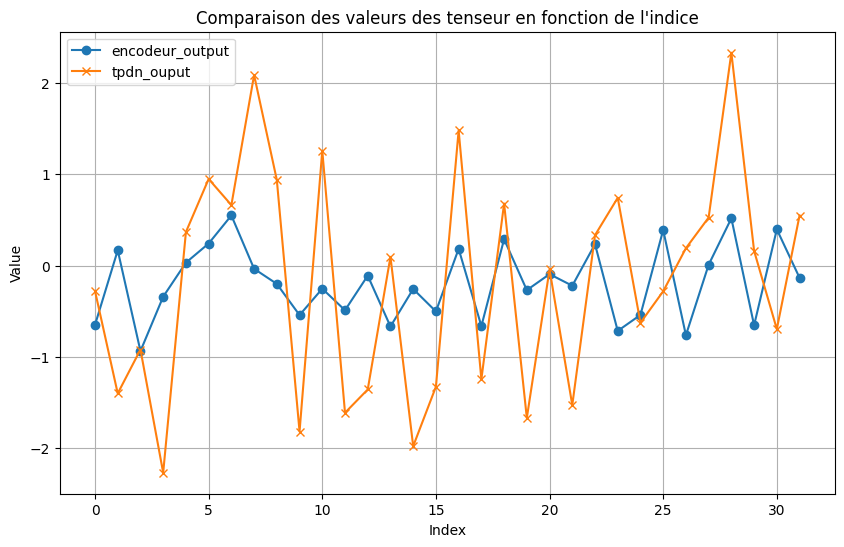

In [89]:


input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10

batch_size = 1
seq_len = 10
epochs = 1000
learning_rate = 0.001
seq_len_tensor = torch.tensor([seq_len])

# encoder = GRUEncoder(input_size, emb_size, hidden_size)
# encoder.load_state_dict(torch.load("./models/gru_enc.pth"))
encoder = torch.load("./models/gru_enc.pth")
tpdnencoder = TensorProductEncoder(n_roles=seq_len, n_fillers=seq_len, filler_dim=hidden_size, role_dim=hidden_size, hidden_size=hidden_size)

# decoder = GRUDecoder(emb_size, hidden_size, output_size)
# decoder.load_state_dict(torch.load("./models/gru_dec.pth"))

def generate_data(batch_size, seq_len, input_size):
    data = torch.randint(0, input_size, (batch_size, seq_len))  # fillers
    roles = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # rôles
    return data, roles



criterion = nn.MSELoss()
optimizer = optim.Adam(list(encoder.parameters()) + list(tpdnencoder.parameters()), lr=learning_rate)


for epoch in range(epochs):
    encoder.eval()
    tpdnencoder.train()

    data, roles = generate_data(batch_size, seq_len, input_size)

    encoder_output = encoder(data).squeeze(0)  
    tpdn_output = tpdnencoder(data, roles) 
    # reconstructed_x = decoder(tpdn_output.unsqueeze(0), seq_len_tensor)
    loss = criterion(encoder_output, tpdn_output.unsqueeze(0))

    # accuracy = precision(reconstructed_x, data)
    # print(accuracy)    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

        # print( f"encodeur : {encoder_output}")

        # print( f"tpdn  : {tpdn_output}")
print(data)
plot_tensors(encoder_output, tpdn_output, labels = ("encodeur_output","tpdn_ouput"))
print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%")

# torch.save(tpdnencoder.state_dict(), "./models/tpdn_gru.pth")
torch.save(tpdnencoder,'test.pth')
plt.clf()
print("après save ")

data2, roles2 = generate_data(batch_size, seq_len, input_size)
encoder_output2 = encoder(data2).squeeze(0)  
tpdn_output2 = tpdnencoder(data2, roles2) 
print(data2)
plot_tensors(encoder_output2, tpdn_output2, labels = ("encodeur_output","tpdn_ouput"))

tensor([[8, 8, 7, 1, 1, 7, 8, 5, 5, 5]])


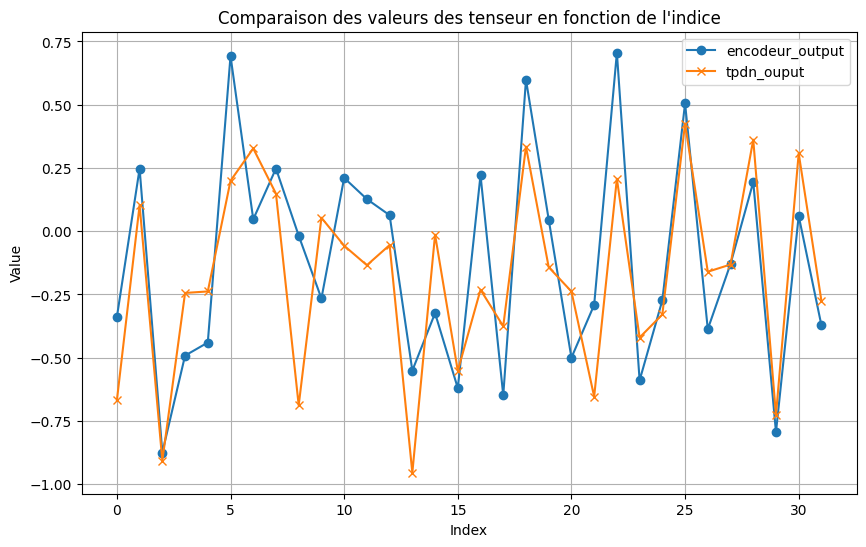

In [88]:
encoder  = torch.load("./models/gru_enc.pth")
# tpdnencoder = TensorProductEncoder(n_roles=seq_len, n_fillers=seq_len, filler_dim=hidden_size, role_dim=hidden_size, hidden_size=hidden_size)

tpdnencoder = torch.load("test.pth")

data, roles = generate_data(batch_size, seq_len, input_size)
encoder_output = encoder(data).squeeze(0)  
tpdn_output = tpdnencoder(data, roles) 
print(data)
plot_tensors(encoder_output, tpdn_output, labels = ("encodeur_output","tpdn_ouput"))

In [17]:
def generate_data(batch_size, seq_len, input_size):
    data = torch.randint(0, input_size, (batch_size, seq_len))  # fillers
    roles = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # rôles
    return data, roles

for _ in range(10):
    data, roles = generate_data(batch_size, seq_len, input_size)
    print(data)

tensor([[0, 5, 6, 2, 4, 1, 8, 4, 8, 9]])
tensor([[3, 3, 5, 8, 2, 7, 7, 9, 6, 1]])
tensor([[3, 7, 8, 0, 7, 6, 0, 8, 4, 5]])
tensor([[3, 9, 7, 3, 0, 0, 9, 3, 2, 5]])
tensor([[6, 2, 0, 0, 0, 2, 7, 0, 0, 9]])
tensor([[1, 9, 6, 4, 9, 9, 0, 6, 9, 0]])
tensor([[8, 6, 7, 4, 9, 1, 7, 0, 7, 3]])
tensor([[6, 8, 2, 1, 2, 7, 5, 2, 9, 7]])
tensor([[6, 1, 5, 4, 4, 6, 6, 1, 2, 7]])
tensor([[5, 1, 2, 0, 1, 5, 0, 3, 2, 3]])


# Eval / Test

Pour comprendre les différences d'accuracy en sortie du décodeur :

loss : 0.029541565105319023
tensor([[[-0.2235, -0.0035, -0.1738,  0.7139, -0.1364, -0.4343, -0.1703,
          -0.5571,  0.5546, -0.3168, -0.9263, -0.2693, -0.9697, -0.6333,
           0.3256, -0.2310,  0.5131,  0.5493, -0.3016,  0.0483,  0.7926,
          -0.2784,  0.0395,  0.5557, -0.9467,  0.7272,  0.7192, -0.7162,
          -0.1683, -0.4392, -0.1490, -0.2864]]], grad_fn=<StackBackward0>)
tensor([[-0.5300,  0.0178, -0.1946,  0.6542, -0.2313, -0.4693, -0.0118, -0.4607,
          0.3054, -0.3323, -0.9381, -0.3324, -0.9694, -0.5141,  0.2458, -0.1173,
          0.5499,  0.4446, -0.1587, -0.0336,  1.3908, -0.2108,  0.1943,  0.3845,
         -0.9630,  0.6643,  0.3409, -0.6298, -0.1810, -0.2680,  0.0345, -0.4573]],
       grad_fn=<AddmmBackward0>)


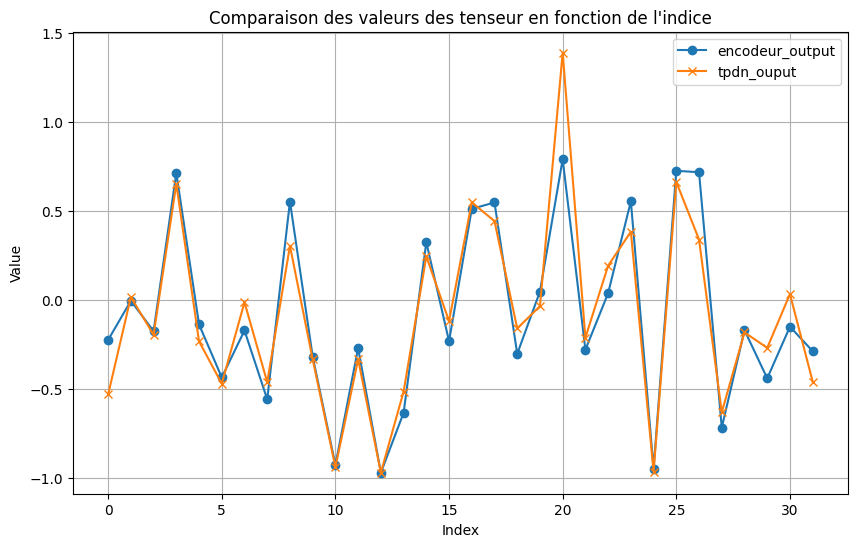

tensor([[4, 4, 8, 9, 5, 8, 3, 6, 6, 6]])
tensor([[4, 4, 8, 9, 8, 8, 9, 6, 4, 6]])
tensor([[4, 4, 8, 9, 5, 8, 3, 6, 6, 6]])
69.9999988079071
100.0


In [21]:


def generate_data(batch_size, seq_len, input_size):
    data = torch.randint(0, input_size, (batch_size, seq_len))  # fillers
    roles = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1)  # rôles
    return data, roles




# Hyperparameters
input_size = 10
emb_size = 16
hidden_size = 32
output_size = 10
seq_len = 10
batch_size = 1 # Utiliser plusieurs exemples pour analyse

criterion = nn.MSELoss()


encoder = torch.load('./models/gru_enc.pth')
tpdnencoder = torch.load('./models/tpdn_gru.pth')
decoder = torch.load("./models/gru_dec.pth")

encoder.eval()
tpdnencoder.eval()
decoder.eval()

### TEST
data, roles = generate_data(batch_size, seq_len, input_size)

encoder_output = encoder(data)  # (seq_len, batch_size, hidden_size)
tpdn_output = tpdnencoder(data, roles)  # (batch_size, hidden_size)
loss = criterion(encoder_output, tpdn_output)

print(f"loss : {loss}")
print(encoder_output)
print(tpdn_output)

seq_len_tensor = torch.tensor([seq_len])

reconstructed_tpdn = decoder(tpdn_output.unsqueeze(0), seq_len_tensor)
reconstructed_gru = decoder(encoder_output, seq_len_tensor)

plot_tensors(encoder_output.squeeze(0)  , tpdn_output, labels = ("encodeur_output","tpdn_ouput"))
print(data)
print(reconstructed_tpdn.argmax(dim=-1))
print(reconstructed_gru.argmax(dim=-1))
print( precision(reconstructed_tpdn, data))
print( precision(reconstructed_gru, data))
